In [1]:
# Import useful dependencies
import matplotlib.pyplot as plt
import nibabel as nib
import os
import numpy as np

(176, 256, 256)


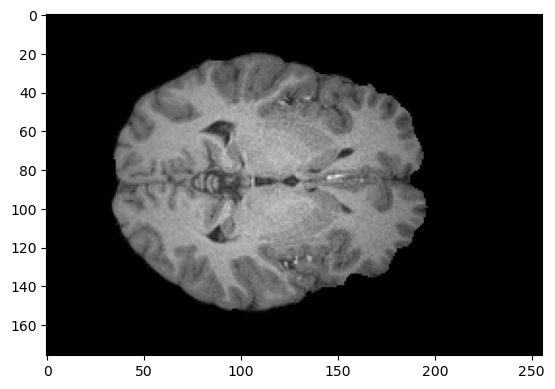

In [4]:
t1 = "/indirect/student/magnuschristensen/dev/fmdc/downloads/synb0-disco/INPUTS/ds002898/sub-01/t-121/T1.nii.gz"
t1_data = nib.load(t1).get_fdata()
print(t1_data.shape)

plt.imshow(t1_data[:, :, t1_data.shape[2] // 2], cmap='grey')

(64, 64, 44, 242) (64, 64, 44)


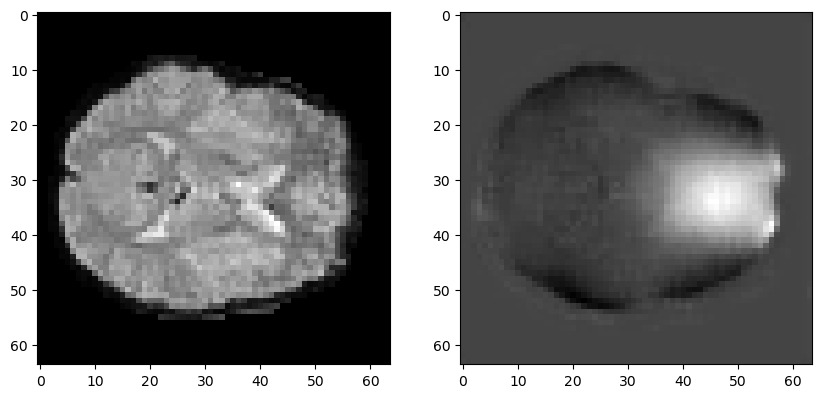

In [11]:
bold = "/indirect/student/magnuschristensen/dev/fmdc/fmdc-ai-thesis/reports/kfcv/bold.nii.gz"
fmap = "/indirect/student/magnuschristensen/dev/fmdc/fmdc-ai-thesis/reports/kfcv/fmap.nii.gz"
bold_data = nib.load(bold).get_fdata()
fmap_data = nib.load(fmap).get_fdata()
print(bold_data.shape, fmap_data.shape)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(bold_data[:, :, bold_data.shape[2] // 2, bold_data.shape[3] // 2], cmap='gray')
axs[1].imshow(fmap_data[:, :, fmap_data.shape[2] // 2], cmap='gray')

(176, 256, 256)


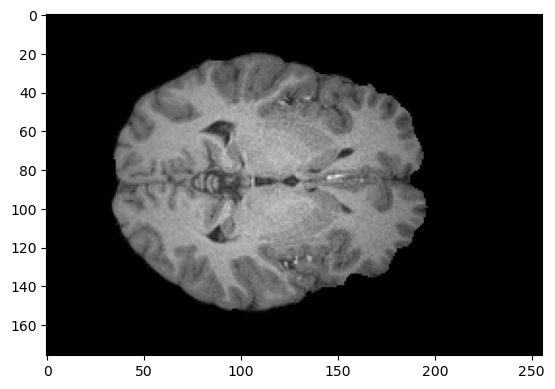

In [2]:
t1 = "/indirect/student/magnuschristensen/dev/fmdc/downloads/synb0-disco/INPUTS/ds002898/sub-01/T1_brain.nii.gz"
t1_img = nib.load(t1).get_fdata()
print(t1_img.shape)
plt.figure(1)
plt.imshow(t1_img[..., t1_img.shape[2] // 2], cmap="gray")

(64, 64, 44) (64, 64, 44, 242) (176, 256, 256)


Text(0.5, 1.0, 'Structural')

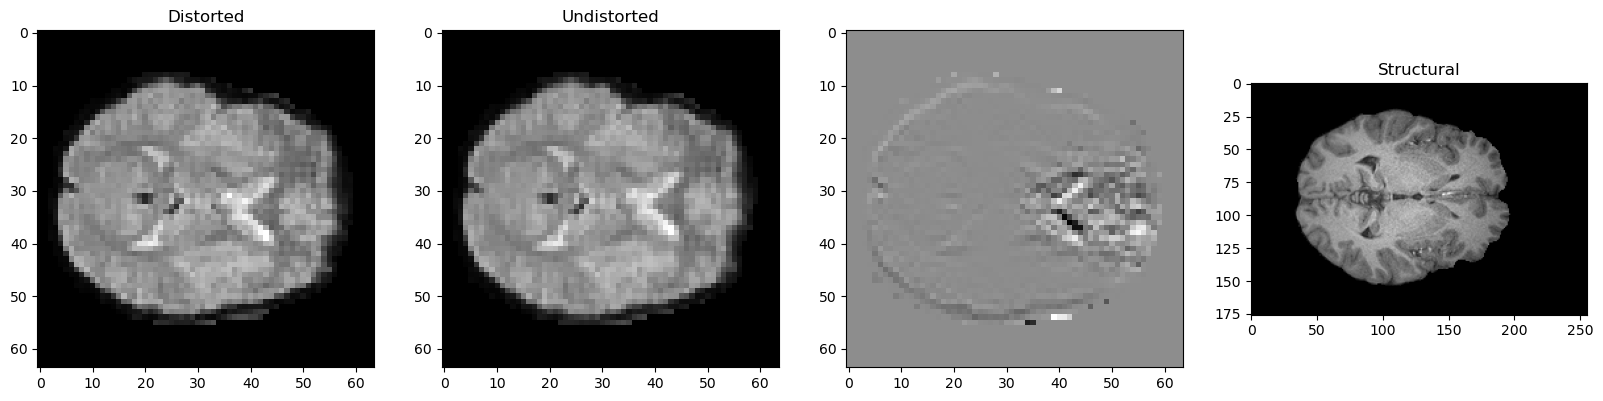

In [7]:
bd_test = nib.load("/indirect/student/magnuschristensen/dev/fmdc/downloads/synb0-disco/INPUTS/ds002898/sub-01/t-002/b0.nii.gz").get_fdata()
bu_test = nib.load("/indirect/student/magnuschristensen/dev/fmdc/downloads/synb0-disco/INPUTS/ds002898/sub-01/t-002/b0_u.nii.gz").get_fdata()
t1_test = nib.load("/indirect/student/magnuschristensen/dev/fmdc/downloads/synb0-disco/INPUTS/ds002898/sub-01/t-002/T1.nii.gz").get_fdata()
print(bd_test.shape, bu_test.shape, t1_test.shape)

fig, axs = plt.subplots(1, 4, figsize=(20,5))
axs[0].imshow(bd_test[:, :, bd_test.shape[2] // 2], cmap="grey")
axs[0].set_title("Distorted")
axs[1].imshow(bu_test[:, :, bu_test.shape[2] // 2, 2], cmap="grey")
axs[1].set_title("Undistorted")

b_diff = bd_test - bu_test[..., 2]
axs[2].imshow(b_diff[:, :, b_diff.shape[2] // 2], cmap="grey")
axs[3].imshow(t1_test[:, :, t1_test.shape[2] // 2], cmap="grey")
axs[3].set_title("Structural")


In [64]:
# Define the image paths
root = "/student/magnuschristensen/dev/fmdc/downloads/processed-datasets/test-processed/ds005165/sub-04"
t1w = os.path.join(root, "T1w.nii.gz")
fieldmap = os.path.join(root, "field_map.nii.gz")
b0d = os.path.join(root, "b0_d.nii.gz")
b0u = os.path.join(root, "b0_u.nii.gz")

# Load the images
t1w = nib.load(t1w).get_fdata()
fieldmap = nib.load(fieldmap).get_fdata()
b0d = nib.load(b0d).get_fdata()
b0u = nib.load(b0u).get_fdata()

# Print all of the shapes
print(f"t1w shape: {t1w.shape}")
print(f"fieldmap shape: {fieldmap.shape}")
print(f"b0d shape: {b0d.shape}")
print(f"b0u shape: {b0u.shape}")

t1w shape: (76, 76, 54)
fieldmap shape: (76, 76, 54, 2)
b0d shape: (76, 76, 54, 212)
b0u shape: (76, 76, 54, 212)


In [65]:
b0d_single_split_10 = b0d[..., b0d.shape[3]//2-5:b0d.shape[3]//2+5]

In [66]:
b0d_single_split_10.shape

(76, 76, 54, 10)

In [67]:
mid = b0d_single_split_10.shape[3] // 2
b0d_single_split = b0d_single_split_10[..., mid-2:mid+3]
if len(b0d_single_split.shape) == 3:
    b0d_single_split = np.expand_dims(b0d_single_split, axis=0).transpose(1,2,3,0)
print(b0d_single_split.shape)

(76, 76, 54, 5)


Text(0.5, 1.0, 'Undistorted')

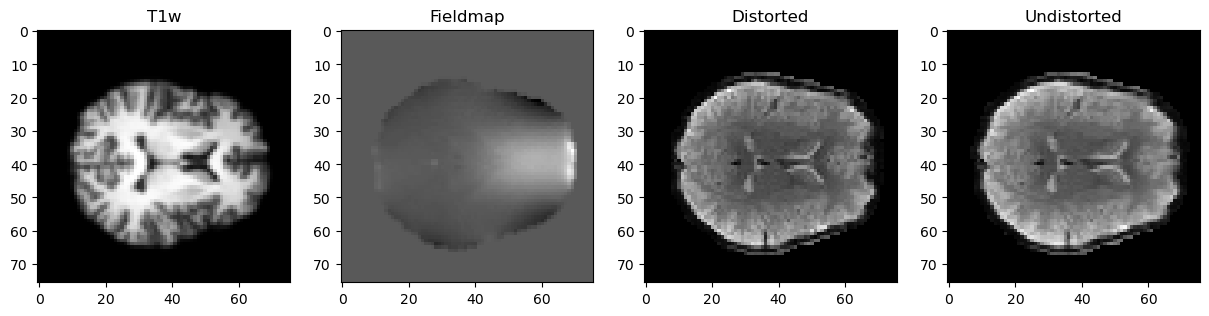

In [21]:
fieldmap = fieldmap[..., 0]
b0d = b0d[..., b0d.shape[3] // 2]
b0u = b0u[..., b0u.shape[3] // 2]

fig, ax = plt.subplots(1, 4, figsize=(15,5))
ax[0].imshow(t1w[..., t1w.shape[2] // 2], cmap="grey")
ax[0].set_title("T1w")
ax[1].imshow(fieldmap[..., fieldmap.shape[2] // 2], cmap="grey")
ax[1].set_title("Fieldmap")
ax[2].imshow(b0d[..., b0d.shape[2] // 2], cmap="grey")
ax[2].set_title("Distorted")
ax[3].imshow(b0u[..., b0u.shape[2] // 2], cmap="grey")
ax[3].set_title("Undistorted")

In [6]:
# Load T1w image
img_t1w = nib.load(t1w)
img_t1w_data = img_t1w.get_fdata()
print(f"T1w image shape: {img_t1w_data.shape}")

T1w image shape: (64, 64, 37)


In [7]:
# Load fieldmap image
img_fieldmap = nib.load(fieldmap)
img_fieldmap_data = img_fieldmap.get_fdata()
print(f"Fieldmap image shape: {img_fieldmap_data.shape}")

Fieldmap image shape: (64, 64, 37, 2)


In [ ]:
# Load bold image
img_bold = nib.load(bold)
img_bold_data = img_bold.get_fdata()
img_bold_data_sliced = img_bold_data[:, :, :, img_bold_data.shape[3] // 2]
print(f"BOLD image shape: {img_bold_data.shape}")

BOLD image shape: (64, 64, 37, 10)


Text(0.5, 1.0, 'Example BOLD image')

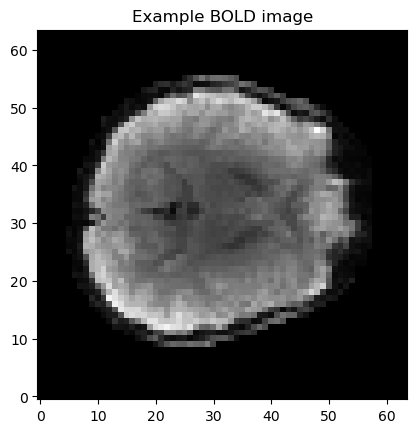

In [16]:
# Display the image
plt.figure(1)
plt.imshow(img_bold_data_sliced[:, :, img_bold_data_sliced.shape[2] // 2], origin="lower", cmap="gray")
plt.title("Example BOLD image")